# Analiza podatkov 3850 največjih smučišč na svetu

Analiza podatkov bo potekala v štirih sklopih;
1. Posamična analiza,
2. Analiza po državah,
3. Analiza po celinah,
4. Analiza slovenskih smučišč.

Najprej naložimo ustrezne pakete.

In [1178]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
smucisca = pd.read_csv(r'C:\Users\Nejc\AnalizaBesed\ProjektnaNaloga2024\smucisca.csv', index_col='položaj')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše največ 20 vrstic
pd.options.display.max_rows = 20

# omogoči celotno širino stolpca
pd.set_option('display.max_colwidth', None)  

# grafi
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Spodaj je prikazana razpredelnica, s katero bomo analizirali podatke. Najprej je prikazan položaj smučišča na svetovni lestvici, urejeni po velikosti smučišč. Ta podatek je nastavljen kot indeks. Sledijo ime smučišča, celina in država, v kateri se nahaja. Kjer država ni navedena, je vrednost nastavljena na 'no data'. Nato so predstavljeni še številski podatki: ocena (od 0 do 5), višinska razlika (izražena v metrih), skupna dolžina prog ter dolžina modrih, rdečih in črnih prog posamezno (izraženo v kilometrih), in skupno število žičnic. Kjer podatki niso bili podani, je vrednost nastavljena na 'NaN'. Pri nekaterih analizah so smučišča, ki imajo kakšen podatek 'NaN', izvzeta iz analize.
Pri ruskih smučiščih, kjer celina ni bila podana, so bile navedene regije. Na podlagi teh regij je smučišče umeščeno na evropski ali azijski del Rusije.

In [1179]:
smucisca

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157.0
2,Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165.0
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonnaz/Thyon,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68.0
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70.0
5,Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51.0
...,...,...,...,...,...,...,...,...,...,...
3789,Äänemäki – Äänekoski,Europe,Finland,2.1,65.0,0.8,0.2,0.6,0.0,2.0
3789,Birkenlift,Europe,Austria,2.1,47.0,0.8,0.8,0.0,0.0,4.0
3789,Taisten (Tesido),Europe,Italy,2.1,168.0,0.8,0.8,0.0,0.0,NaN


# <h2>1. Posamična analiza</h2>

# <h3>1.1 Splošno</h3>

Oglejmo si podatke največjega smučišča na svetu.

In [1180]:
# najdem smučišče z indexom 1
najvecje_smucisce_na_svetu = smucisca.loc[1]
print(najvecje_smucisce_na_svetu)


ime                 Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel
celina                                                                   Europe
država                                                                   France
ocena                                                                       4.6
višinska_razlika                                                         2130.0
proge                                                                     600.0
modre                                                                     312.0
rdeče                                                                     216.0
črne                                                                       72.0
žičnice                                                                   157.0
Name: 1, dtype: object


Spodaj so prikazana najbolje ocenjena smučišča ter število smučišč z oceno 4 ali več.

In [1181]:
smucisca_z_najvisjimi_ocenami = smucisca[smucisca['ocena'] >= 4.0]
print(f'\nŠtevilo smučišč, z oceno vsaj 4, je {len(smucisca_z_najvisjimi_ocenami)}. To predstavlja {(len(smucisca_z_najvisjimi_ocenami)/len(smucisca) * 100):.1f} % vseh smučišč pri naši analizi.')
smucisca_z_najvisjimi_ocenami


Število smučišč, z oceno vsaj 4, je 170. To predstavlja 4.4 % vseh smučišč pri naši analizi.


,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157.0
2,Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165.0
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonnaz/Thyon,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68.0
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70.0
5,Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51.0
...,...,...,...,...,...,...,...,...,...,...
617,St. Jakob im Defereggental – Brunnalm,Europe,Austria,4.0,1283.0,23.7,5.0,12.5,6.2,7.0
785,Ruka,Europe,Finland,4.0,201.0,19.1,9.1,7.0,3.0,22.0
805,Ladurns,Europe,Italy,4.0,890.0,18.0,8.4,8.4,1.2,3.0


Katera pa so najslabše ocenjena smučišča?

In [1182]:
najslabse_ocenjena_smucisca = smucisca.sort_values('ocena').head(10)
najslabse_ocenjena_smucisca[['ime', 'celina', 'ocena']]

,ime,celina,ocena
položaj,,,
2622,Zagarkalns,Europe,0.0
3725,Ödengrub – Kemnath bei Fuhrn/Schwarzenfeld,Europe,2.0
3725,Sahalie Ski Club,North America,2.0
3725,Standing Rocks,North America,2.0
3725,Ski Ivan – Kupres,Europe,2.0
3491,Les Loges – La Vue des Alpes,Europe,2.0
3491,Leavenworth Ski Hill,North America,2.0
3491,Powers Bluff,North America,2.0
3491,Haugstein – Engelhartszell (planned),Europe,2.0


Opazimo, da ima Evropa poleg najbolje ocenjenih tudi najslabše ocenjena smučišča.

Koliko pa je povprečna ocena vseh smučišč, zajetih v naši analizi?

In [1183]:
# povprečna ocena vseh smučišč, izključimo tista z oceno NaN
smucisca_ocena_nan = smucisca.dropna(subset=['ocena'])
povprecna_ocena = smucisca_ocena_nan['ocena'].sum() / len(smucisca_ocena_nan)
print(f'\nPovprečna ocena je {povprecna_ocena:.1f}.')


Povprečna ocena je 2.7.


Zanima nas smučišče z največjo višinsko razliko ter število smučišč z višinsko razliko, večjo od 2000 metrov.

In [1184]:
# pridobimo index smučišča z največjo višinsko razliko
index_najvecje_visinske_razlike = smucisca['višinska_razlika'].idxmax()  

# pridobimo vse podatke za to smučišče
smucisce_z_najvecjo_visinsko_razliko = smucisca.loc[index_najvecje_visinske_razlike]  

# Izpišemo vse podatke smučišča
print(smucisce_z_najvecjo_visinsko_razliko)
print(f'\nNajvečja višinska razlika je {smucisce_z_najvecjo_visinsko_razliko['višinska_razlika']} metrov.')

smucisca_nad_2000 = smucisca[smucisca['višinska_razlika'] >= 2000]
print(f'Število smučišč z višinsko razliko, večjo od 2000 metrov, je {len(smucisca_nad_2000)}.')


ime                 Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn
celina                                                          Europe
država                                                     Switzerland
ocena                                                              4.5
višinska_razlika                                                2337.0
proge                                                            322.0
modre                                                             75.0
rdeče                                                            220.0
črne                                                              27.0
žičnice                                                           51.0
Name: 5, dtype: object

Največja višinska razlika je 2337.0 metrov.
Število smučišč z višinsko razliko, večjo od 2000 metrov, je 11.


Naslednji podatek je skupna dolžina prog (oznaka: 'proge'). Zanima nas povprečna dolžina prog ter koliko smučišč ima dolžino prog čez 100 km.

In [1185]:
povprecna_dolzina_prog = smucisca['proge'].mean()
stevilo_smucisc_nad_100_km = smucisca[smucisca['proge'] > 100].shape[0]
print(f'\nPovprečna dolžina prog: {povprecna_dolzina_prog:.2f} km')
print(f'Stevilo smučišč z dolžino prog več kot 100 km: {stevilo_smucisc_nad_100_km}')


Povprečna dolžina prog: 15.48 km
Stevilo smučišč z dolžino prog več kot 100 km: 97


Poglejmo si smučišča, ki imajo največ žičnic glede na dolžino prog. Podan je tudi graf.

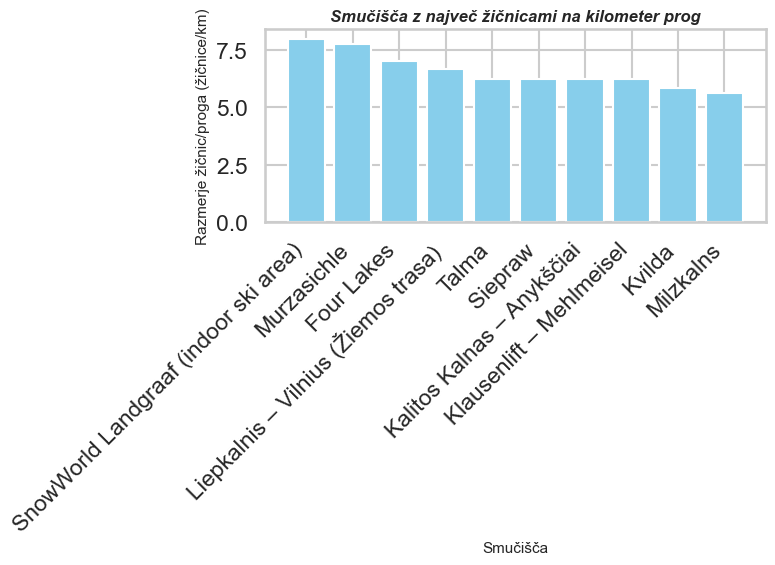

Največjih 10 smučišč po številu žičnic na kilometer prog:


,ime,žičnice,proge,razmerje_žičnic_proge
rang,,,,
1,SnowWorld Landgraaf (indoor ski area),8.0,1.0,8.00
2,Murzasichle,7.0,0.9,7.78
3,Four Lakes,7.0,1.0,7.00
4,Liepkalnis – Vilnius (Žiemos trasa),10.0,1.5,6.67
5,Talma,5.0,0.8,6.25
5,Siepraw,5.0,0.8,6.25
5,Kalitos Kalnas – Anykščiai,5.0,0.8,6.25
5,Klausenlift – Mehlmeisel,5.0,0.8,6.25
9,Kvilda,7.0,1.2,5.83


In [1186]:
# naredimo kopijo, da ne spremenimo originalne
smucisca_kopija = smucisca.copy()

# izločimo smučišča, kjer je število žičnic 0 ali NaN
smucisca_kopija = smucisca_kopija.dropna(subset=['žičnice']) 
smucisca_kopija = smucisca_kopija[smucisca_kopija['žičnice'] > 0]  

# izračunamo razmerje žičnic/proge, uredimo
smucisca_kopija['razmerje_žičnic_proge'] = smucisca_kopija['žičnice'] / smucisca_kopija['proge']
smucisca_kopija['razmerje_žičnic_proge'] = smucisca_kopija['razmerje_žičnic_proge'].round(2)
urejena_smucisca_po_razmerju_zicnic_proge = smucisca_kopija.sort_values(by='razmerje_žičnic_proge', ascending=False)
urejena_smucisca_po_razmerju_zicnic_proge['rang'] = urejena_smucisca_po_razmerju_zicnic_proge['razmerje_žičnic_proge'].rank(method='min', ascending=False).astype(int)

# odstranimo položaj in nastavimo rang kot nov index
urejena_smucisca_po_razmerju_zicnic_proge = urejena_smucisca_po_razmerju_zicnic_proge[['ime', 'žičnice', 'proge', 'razmerje_žičnic_proge', 'rang']]
urejena_smucisca_po_razmerju_zicnic_proge = urejena_smucisca_po_razmerju_zicnic_proge.set_index('rang')

# graf
plt.figure(figsize=(8, 6))
plt.bar(urejena_smucisca_po_razmerju_zicnic_proge['ime'].head(10), urejena_smucisca_po_razmerju_zicnic_proge['razmerje_žičnic_proge'].head(10), color='skyblue')
plt.title('Smučišča z največ žičnicami na kilometer prog', fontsize=12, fontweight='bold', style='italic')
plt.xlabel('Smučišča', fontsize=11)
plt.ylabel('Razmerje žičnic/proga (žičnice/km)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Največjih 10 smučišč po številu žičnic na kilometer prog:")
urejena_smucisca_po_razmerju_zicnic_proge.head(10)



Smiselno bi si bilo ogledati dolžine modrih, rdečih in črnih prog največjih 10 smučišč.

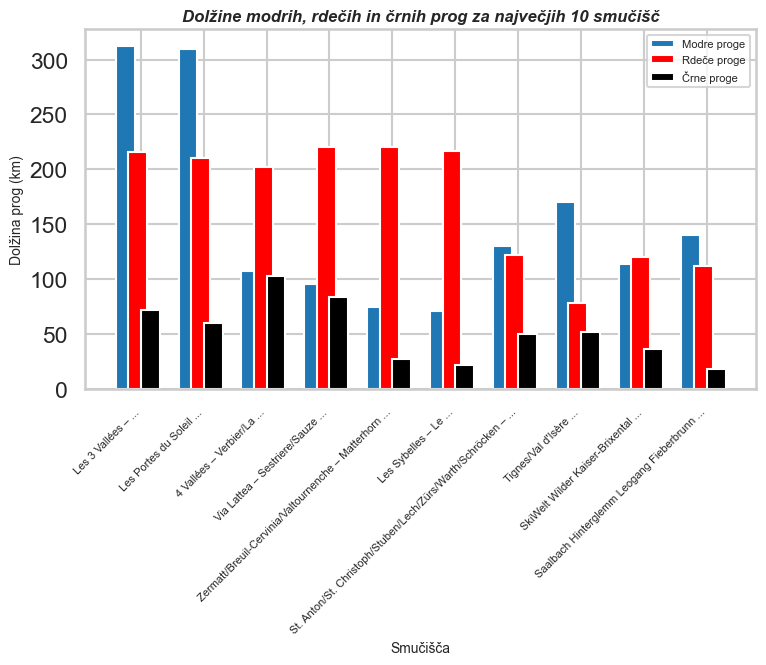

In [1187]:
# poiščemo največjih 10 smučišč na svetu
najvecjih_10_smucisc = smucisca.sort_values(by='proge', ascending=False).head(10)

# ustvarimo x-koordinato
x = np.arange(len(najvecjih_10_smucisc))

# velikost
plt.figure(figsize=[8, 7])

# narišemo vse tri stolpce za vsako državo
plt.bar(x, najvecjih_10_smucisc['modre'], color='#1f77b4', width=0.3, label='Modre proge')
plt.bar(x + 0.2, najvecjih_10_smucisc['rdeče'], color='red', width=0.3, label='Rdeče proge')
plt.bar(x + 0.4, najvecjih_10_smucisc['črne'], color='black', width=0.3, label='Črne proge')

# podam imena osi
plt.xlabel('Smučišča', fontsize=10)
plt.ylabel('Dolžina prog (km)', fontsize=10)
plt.title('Dolžine modrih, rdečih in črnih prog za največjih 10 smučišč', fontsize=12, fontweight='bold', fontstyle='italic')

# oznake na x osi
plt.xticks(x + 0.25, najvecjih_10_smucisc['ime'].str.split().str[:4].str.join(' ') + ' ...', rotation=45, ha='right', fontsize=8)

# legenda
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


Opazimo, da se največjih 10 smučišč najbolj razlikuje v dolžini modrih prog ter najmanj v dolžini črnih.

Sedaj nas zanima smučišče z največjim deležem najtežjih, torej črnih prog. Prikazali bomo s tortnim diagramom.

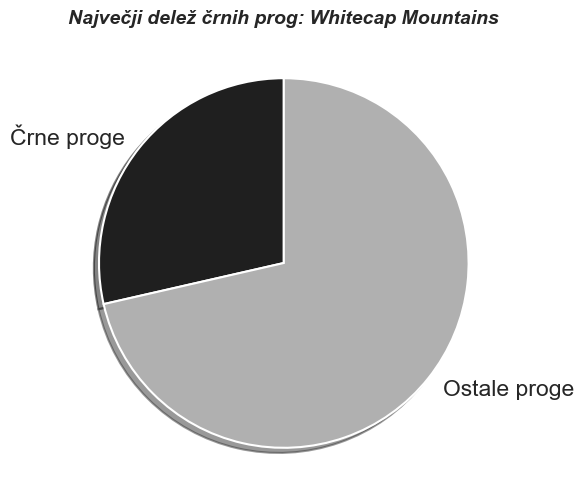

Smučišče z največjim deležem črnih prog je Whitecap Mountains, ki ima 28.6 % črnih prog.


In [1188]:
# izračunajmo najprej delež črnih prog za vsako smučišče
smucisca_copy = smucisca.copy()
smucisca_copy = smucisca_copy.dropna(subset=['proge', 'črne']) 
smucisca_copy['% črnih prog'] = (smucisca_copy['črne'] / smucisca_copy['proge']) * 100

# poiščemo to smučišče
najvecji_delez_crnih_prog = smucisca_copy.iloc[smucisca_copy['% črnih prog'].idxmax()]
smucisce_z_najvec_crnimi_progami = najvecji_delez_crnih_prog['ime']
delez_crnih_procent = najvecji_delez_crnih_prog['% črnih prog']

# priprava podatkov
labels = ['Črne proge', 'Ostale proge']
sizes = [delez_crnih_procent, 100 - delez_crnih_procent]
colors = ['#1f1f1f', '#b0b0b0']  

# nastavitve grafa
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, shadow=True, pctdistance=0.5, wedgeprops={'edgecolor': 'white'})
plt.title(f'Največji delež črnih prog: {smucisce_z_najvec_crnimi_progami}', fontsize=14, fontweight='bold', style='italic')
plt.show()

print(f"Smučišče z največjim deležem črnih prog je {smucisce_z_najvec_crnimi_progami}, ki ima {delez_crnih_procent:.1f} % črnih prog.")


Sedaj bomo to naredili splošneje; poiskali bomo odstotke vseh vrst prog posameznega smučišča ter jih uredili najprej po procentu črnih, potem rdečih in na koncu modrih.

In [1217]:
# izračunajmo delež modrih in rdečih prog, za črne proge pa že imamo
smucisca_copy = smucisca_copy.dropna(subset=['rdeče', 'modre']) 
smucisca_copy['% modre proge'] = (smucisca_copy['modre'] / smucisca_copy['proge']) * 100
smucisca_copy['% rdeče proge'] = (smucisca_copy['rdeče'] / smucisca_copy['proge']) * 100

# za lažjo obdelavo kopiram smucisca in izbrisem vrstice s kakšno vrednostjo naN
smucisca_pociscena_naN = smucisca_copy.dropna(subset=['% črnih prog', '% rdeče proge', '% modre proge'])

# urejanje po deležu črnih, rdečih in na koncu modrih
urejena_smucisca_brez_naN = smucisca_pociscena_naN.sort_values(by=['% črnih prog', '% rdeče proge', '% modre proge'], ascending=False)

# zaokrožimo procentne vrednosti na 2 decimalni mesti
urejena_smucisca_brez_naN['% modre proge'] = urejena_smucisca_brez_naN['% modre proge'].round(1)
urejena_smucisca_brez_naN['% rdeče proge'] = urejena_smucisca_brez_naN['% rdeče proge'].round(1)
urejena_smucisca_brez_naN['% črnih prog'] = urejena_smucisca_brez_naN['% črnih prog'].round(1)

# index
urejena_smucisca_brez_naN.index = range(1, len(urejena_smucisca_brez_naN) + 1)

urejena_smucisca_brez_naN[['ime', '% modre proge', '% rdeče proge', '% črnih prog']].head(10)

,ime,% modre proge,% rdeče proge,% črnih prog
1,Balea Lac,0.0,0.0,100.0
2,Laber – Oberammergau,0.0,0.0,100.0
3,Kasprowy Wierch – Zakopane,0.0,0.0,100.0
4,Wallberg – Rottach-Egern,0.0,0.0,100.0
5,Sapgör – Bitlis,0.0,0.0,100.0
6,Huacachina (sand ski area),0.0,0.0,100.0
7,Crni vrh – Bor,0.0,16.7,83.3
8,Mt. Bohemia,0.0,23.1,76.9
9,Alpental,5.2,24.0,70.8
10,Gulmarg (Kongdoori-Apharwat),10.0,20.0,70.0


Poglejmo si smučišča z največ žičnicami.

In [1234]:
smucisca_najvec_zicnic = smucisca.sort_values(by='žičnice', ascending=False).head(10)
smucisca_najvec_zicnic['žičnice'] = smucisca_najvec_zicnic['žičnice'].astype(int)
print(smucisca_najvec_zicnic[['ime', 'celina', 'žičnice']].to_string(index=False))


                                                                                    ime celina  žičnice
                Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry Europe      165
                            Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel Europe      157
                                                                     Tignes/Val d'Isère Europe       85
                 St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth/Schröcken – Ski Arlberg Europe       85
Espace Diamant – Les Saisies/Notre-Dame-de-Bellecombe/Praz sur Arly/Flumet/Crest-Voland Europe       82
                                                                   Megève/Saint-Gervais Europe       81
                                                        SkiWelt Wilder Kaiser-Brixental Europe       81
                                                                   Val Gardena (Gröden) Europe       79
                 Grandvalira – Pas de la Casa/Grau Roig/Soldeu/E

Opazimo, da imajo največ žičnic Evropska smučišča.

# <h3>1.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Število žičnic se z večanjem višinske razlike povečuje.</h4>








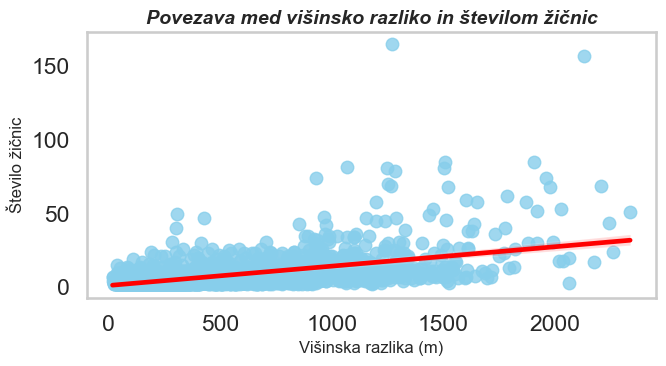

In [1239]:
# graf
plt.figure(figsize=(7, 4))
sns.regplot(x='višinska_razlika', y='žičnice', data=smucisca, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.title('Povezava med višinsko razliko in številom žičnic', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Višinska razlika (m)', fontsize=12)
plt.ylabel('Število žičnic', fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


Hipotezo nam graf potrdi. Ob nižji višinski razliki je število žičnic načeloma dosti majhno, z večanjem višinske razlike pa se poveča število žičnic. To nam potrdi tudi naslednja razpredelnica.

In [1241]:
# ustvarimo razrede višinske razlike (po 400 m)
smucisca_copy_visinski_razred = smucisca.copy()
smucisca_copy_visinski_razred = smucisca_copy_visinski_razred.dropna(subset=['višinska_razlika', 'žičnice'])
bins = [0, 400, 800, 1200, 1600, 2000, 2400] 
labels = ['(0-400) m', '(400-800) m', '(800-1200) m', '(1200-1600) m', '(1600-2000) m', '(2000-2400) m']
smucisca_copy_visinski_razred['višinski_razred'] = pd.cut(smucisca_copy_visinski_razred['višinska_razlika'], bins=bins, labels=labels, right=False)

# izračunamo povprečno število žičnic v posameznem razredu višinske razlike
povprecje_zicnic_v_visinskem_razredu = round(smucisca_copy_visinski_razred.groupby('višinski_razred', observed=False)['žičnice'].mean().reset_index(), 2)
povprecje_zicnic_v_visinskem_razredu.index += 1

print("Povprečno število žičnic po razredih višinske razlike (po 400 m):")
povprecje_zicnic_v_visinskem_razredu

Povprečno število žičnic po razredih višinske razlike (po 400 m):


,višinski_razred,žičnice
1,(0-400) m,4.05
2,(400-800) m,7.18
3,(800-1200) m,12.82
4,(1200-1600) m,20.33
5,(1600-2000) m,33.06
6,(2000-2400) m,43.09


Po tej razpredelnici se še bolj vidi, da je v vsakem višjem višinskem razredu čedalje več žičnic. 
Moja 1. hipoteza je _POTRJENA_.

<h4>Hipoteza 2: Daljše proge so bolje ocenjene kot krajše.</h4>
Ideja za to hipotezo je, da daljše proge omogočajo boljšo izkušnjo smučanja, saj ponujajo večjo raznolikost ter več priložnosti za uživanje v naravi in izzivih, ki jih smučišča nudijo.

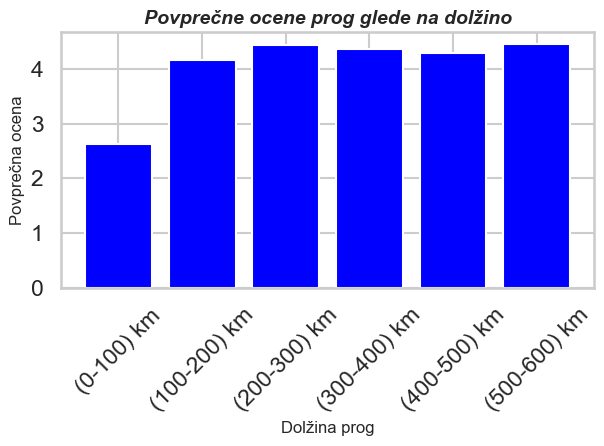

In [1242]:
# naredimo kopijo, da ne spremenimo originalnih podatkov
smucisca_kopija2 = smucisca.copy()

# omejimo
bins = [0, 100, 200, 300, 400, 500, 600]
oznake = ['(0-100) km', '(100-200) km', '(200-300) km', '(300-400) km', '(400-500) km', '(500-600) km']
smucisca_kopija2['dolžina_razred'] = pd.cut(smucisca_kopija2['proge'], bins=bins, labels=oznake, right=True)
povprecne_ocene = smucisca_kopija2.groupby('dolžina_razred', observed=False)['ocena'].mean().reset_index()

# graf    
plt.bar(povprecne_ocene['dolžina_razred'], povprecne_ocene['ocena'], color='blue')
plt.title('Povprečne ocene prog glede na dolžino', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Dolžina prog', fontsize=12)
plt.ylabel('Povprečna ocena', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Kot je razvidno z grafa, je sprememba ocene najbolj opazna pri prehodu s prvega na drugi stolpec. Po tej točki pa so razlike med ocenami zanemarljive in ne stalno naraščajoče ali padajoče. Tako lahko zaključimo, da je ta hipoteza _OVRŽENA_. Razlog za to je, da tudi krajše proge predstavljajo dovolj izzivov tudi za precej izkušene smučarje.

<h4>Hipoteza 3: Večje število žičnic je povezano z višjo oceno smučišča.</h4>
Obstaja domneva, da smučišča z večjim številom žičnic ponujajo boljšo dostopnost in tako prejemajo višje ocene.

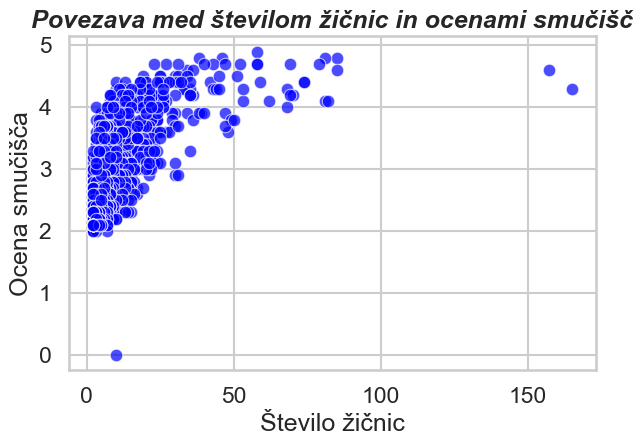

In [1243]:
# da nam ne bo javilo napake o podvojenih vrsticah
smucisca_kopija3 = smucisca.drop_duplicates().reset_index(drop=True)

# izračunamo povezavo med številom žičnic in ocenami
povezava = smucisca_kopija3['žičnice'].corr(smucisca_kopija3['ocena'])

# graf
sns.scatterplot(data=smucisca_kopija3, x='žičnice', y='ocena', color='blue', alpha=0.7)
plt.title('Povezava med številom žičnic in ocenami smučišč',fontweight='bold', style='italic')
plt.xlabel('Število žičnic')
plt.ylabel('Ocena smučišča')
plt.grid(True)
plt.tight_layout()
plt.show()




Iz grafa je lepo razvidno, da so najnižje ocene pri smučiščih z najmanjšim številom žičnic, z večanjem števila teh pa se viša tudi ocena. Ta hipoteza je torej _POTRJENA_.

<h4>Hipoteza 4: Vsaj 90 % najbolje ocenjenih prog (ocena nad 4) se nahaja v Evropi.</h4>

In [1251]:
najbolj_ocenjena_smucisca_hipoteza_4 = smucisca[smucisca['ocena'] >= 4]
stevilo_evropskih = najbolj_ocenjena_smucisca_hipoteza_4[najbolj_ocenjena_smucisca_hipoteza_4['celina'] == 'Europe'].shape[0]
skupno_stevilo = najbolj_ocenjena_smucisca_hipoteza_4.shape[0]
if skupno_stevilo > 0:
    delež_evrope = (stevilo_evropskih / skupno_stevilo) * 100
else:
    delež_evrope = 0

print(f'Procent najbolje ocenjenih prog v Evropi: {delež_evrope:.2f}%')
print(f'Skupno število najbolje ocenjenih prog: {skupno_stevilo}')
print(f'Število najbolje ocenjenih prog v Evropi: {stevilo_evropskih}')

if delež_evrope >= 90:
    print("Hipoteza 4 je potrjena: vsaj 90 % najbolje ocenjenih prog se nahaja v Evropi.")
else:
    print(f"\nHipoteza 4 je ovržena.")


Procent najbolje ocenjenih prog v Evropi: 79.41%
Skupno število najbolje ocenjenih prog: 170
Število najbolje ocenjenih prog v Evropi: 135

Hipoteza 4 je ovržena.


Razlog za ovrženo hipotezo je verjetno v popularnosti severnoameriških smučišč.

# <h2>2. Analiza po državah</h2>


Za začetek tega razdelka si oglejmo države z največ registriranimi smučišči. Prikazano je tudi v obliki stolpičnega diagrama.

In [1195]:
# preštejemo smučišča za vsako državo
smucisca_po_drzavah = smucisca.groupby('država').size().reset_index(name='število_smučišč')

# uredimo po številu smučišč od največ do najmanj
smucisca_po_drzavah = smucisca_po_drzavah.sort_values(by='število_smučišč', ascending=False)

# nastavimo nov index, ki se začne z 1
smucisca_po_drzavah.reset_index(drop=True, inplace=True)
smucisca_po_drzavah.index += 1  

# prikažemo prvih 10 držav
najvec_smucisc_po_drzavah = smucisca_po_drzavah.head(10)
najvec_smucisc_po_drzavah


,država,število_smučišč
1,USA,462
2,Japan,368
3,Austria,312
4,Switzerland,253
5,Germany,252
6,Italy,243
7,France,223
8,Canada,213
9,Czech Republic,205
10,Sweden,160


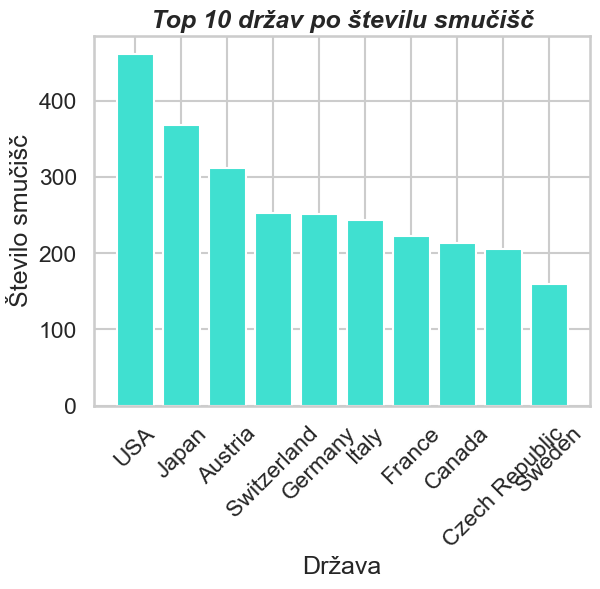

In [1196]:
# ustvarimo stolpični diagram
plt.bar(najvec_smucisc_po_drzavah['država'], najvec_smucisc_po_drzavah['število_smučišč'], color='turquoise')
plt.xlabel('Država')
plt.ylabel('Število smučišč')
plt.title('Top 10 držav po številu smučišč',fontweight='bold', style='italic')
plt.xticks(rotation=45)
plt.show()

Sedaj nas zanimajo države z najdaljšo skupno dolžino smučarskih prog.

In [1197]:
# skupna dolžina prog po državah
dolzina_prog_po_drzavah = smucisca.groupby('država')['proge'].sum()

# uredimo po skupni dolžini prog od največ do najmanj
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.sort_values(ascending=False)

# nastavimo index, da začne od 1
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.reset_index()
dolzina_prog_po_drzavah.index += 1  

najdaljse_dolzina = dolzina_prog_po_drzavah.head(10)
najdaljse_dolzina



,država,proge
1,USA,11188.0
2,France,9101.4
3,Austria,7168.1
4,Switzerland,6704.5
5,Italy,5202.6
6,Canada,4013.2
7,Japan,3083.7
8,Norway,1397.4
9,Sweden,1189.9
10,Spain,1178.4


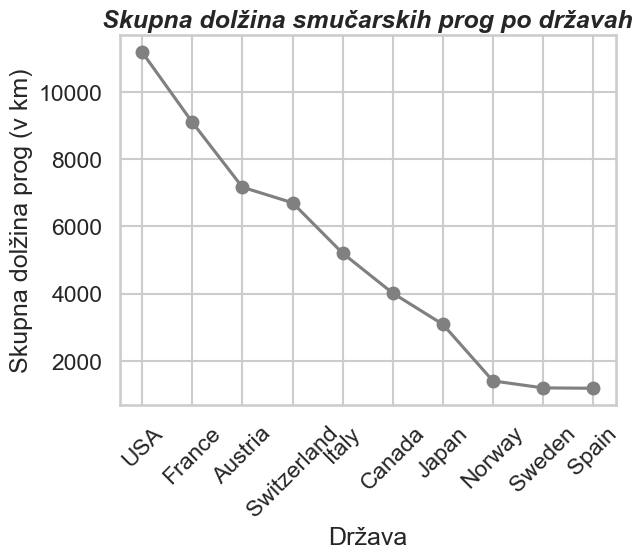

In [1198]:
# graf
plt.plot(najdaljse_dolzina['država'], najdaljse_dolzina['proge'], marker='o', color='gray')
plt.title('Skupna dolžina smučarskih prog po državah', fontweight='bold', style='italic')
plt.xlabel('Država')
plt.ylabel('Skupna dolžina prog (v km)')
plt.xticks(rotation=45)
plt.show()


<h3>3.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Države z boljšo smučarsko infrastrukturo so boljše ocenjene.</h4>
Smučarska infrastruktura vključuje vse osnovne objekte in naprave, ki omogočajo nemoteno delovanje smučišča, kot so smučarske proge, žičnice, vlečnice ter sistemi za zasneževanje in urejanje prog. Ker imamo le podatke o dolžini smučarskih prog in številu žičnic, bomo naredili izračun na podlagi tega.

In [1199]:
smucisca_zicnice_proge_ocene_brez_nan = smucisca.dropna(subset=['žičnice', 'proge', 'ocena'])
print(f'Ostanejo nam podatki o {len(smucisca_zicnice_proge_ocene_brez_nan)} smučiščih.')
infrastruktura_po_drzavah = smucisca_zicnice_proge_ocene_brez_nan.groupby('država').agg({'žičnice': 'sum', 'proge': 'sum'})
infrastruktura_po_drzavah['infrastrukturni_indeks'] = infrastruktura_po_drzavah['žičnice'] / infrastruktura_po_drzavah['proge']
povprecne_ocene_drzave = smucisca_zicnice_proge_ocene_brez_nan.groupby('država')['ocena'].mean()
rezultati_infrastrukture = infrastruktura_po_drzavah.join(povprecne_ocene_drzave, on='država')
top_10_infrastruktura = rezultati_infrastrukture.sort_values('infrastrukturni_indeks', ascending=False).head(10)
print(f"Top 10 držav glede na infrastrukturni indeks in povprečno oceno:\n")
print(top_10_infrastruktura[['infrastrukturni_indeks', 'ocena']])
hipoteza_izpolnjena = all(top_10_infrastruktura['ocena'] > top_10_infrastruktura['infrastrukturni_indeks'])
if hipoteza_izpolnjena:
    print(f"\nHipoteza je izpolnjena: Države z boljšo smučarsko infrastrukturo imajo višje ocene.")
else:
    print(f"\nHipoteza ni izpolnjena: Ni nujno, da države z boljšo infrastrukturo imajo višje ocene.")

Ostanejo nam podatki o 3136 smučiščih.
Top 10 držav glede na infrastrukturni indeks in povprečno oceno:

                      infrastrukturni_indeks     ocena
država                                                
Netherlands                         8.000000  3.200000
Lithuania                           5.681818  2.275000
Greenland                           3.750000  2.100000
Latvia                              3.356643  1.900000
United Arab Emirates                2.000000  3.000000
South Africa                        1.818182  2.150000
Hungary                             1.804511  2.357143
Belgium                             1.728395  2.200000
Albania                             1.538462  2.200000
Estonia                             1.309524  2.275000

Hipoteza ni izpolnjena: Ni nujno, da države z boljšo infrastrukturo imajo višje ocene.


Razlog za to je verjetno v ceni smučarskih vozovnic ali pa morda v smučarski superstrukturi, ki vključuje dodatne storitve in objekte, kot so smučarske šole, hoteli, restavracije, parkirišča in druge turistične ponudbe. Kakovost teh storitev lahko vpliva na splošno uporabniško izkušnjo in zadovoljstvo smučarjev, kar se lahko odraža v višjih ocenah smučišč.

<h4>Hipoteza: Države z večjo povprečno višinsko razliko imajo več smučišč, ki nudijo različne vrste prog (modre, rdeče, črne).</h4>
Razlaga: Večja višinska razlika omogoča večjo raznolikost smučarskih prog.

Hipoteza: Smučišča v evropskih državah prejemajo višje ocene v primerjavi s smučišči na drugih celinah.
Razlaga: Evropa je znana po svojih smučiščih in tradiciji smučanja, kar lahko vpliva na višje ocene.

Kot je razvidno z grafa, je sprememba ocene najbolj opazna pri prehodu s prvega na drugi stolpec. Po tej točki pa so razlike med ocenami zanemarljive in ne stalno naraščajoče ali padajoče. Tako lahko zaključimo, da je ta hipoteza _OVRŽENA_.

# <h2>3. Kontinenti</h2>


<h3>3.1 Splošno</h3>

Najprej si oglejmo število smučišč po celinah.

In [1200]:
smucisca_po_celinah = smucisca['celina'].value_counts().reset_index()
smucisca_po_celinah.index += 1
smucisca_po_celinah.columns = ['Celina', 'Število smučišč']
smucisca_po_celinah

,Celina,Število smučišč
1,Europe,2511
2,North America,678
3,Asia,588
4,South America,33
5,Australia and Oceania,33
6,Africa,7


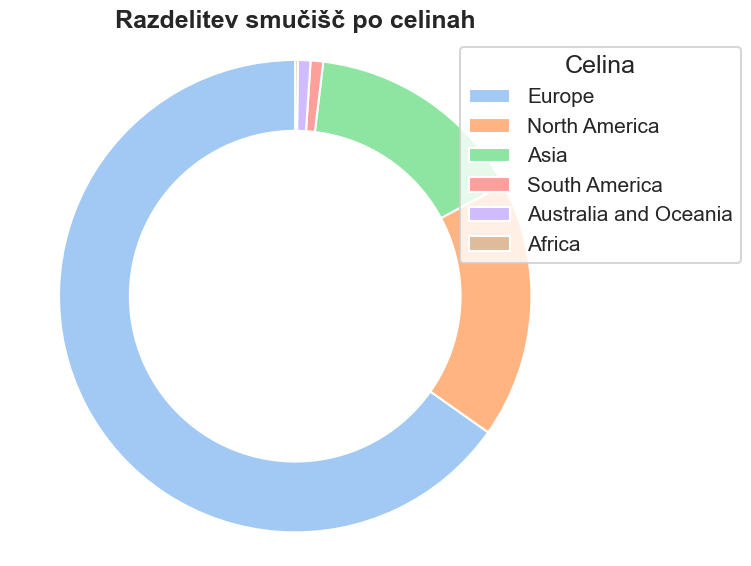

In [1201]:
# velikost
plt.figure(figsize=(8, 6))

# tortni diagram
plt.pie(
    smucisca_po_celinah['Število smučišč'],
    labels=[''] * len(smucisca_po_celinah), 
    colors=sns.color_palette('pastel'),
    startangle=90,
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Razdelitev smučišč po celinah', fontsize=18, fontweight='bold')
plt.legend(smucisca_po_celinah['Celina'], title='Celina', loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
plt.axis('equal')
plt.tight_layout()
plt.show()


Oglejmo si še skupno dolžino prog po celinah, povprečno oceno ter povprečno višinsko razliko.

In [1202]:
analiza_po_celinah = smucisca.groupby('celina').agg({
    'proge': 'sum',          
    'ocena': 'mean',                  
    'višinska_razlika': 'mean'         
}).reset_index()

analiza_po_celinah.sort_values('proge', ascending=False, inplace=True)

analiza_po_celinah.columns = ['Celina', 'Skupna dolžina prog', 'Povprečna ocena', 'Povprečna višinska razlika']

analiza_po_celinah['Skupna dolžina prog'] = analiza_po_celinah['Skupna dolžina prog'].round(1)
analiza_po_celinah['Povprečna ocena'] = analiza_po_celinah['Povprečna ocena'].round(1)
analiza_po_celinah['Povprečna višinska razlika'] = analiza_po_celinah['Povprečna višinska razlika'].round(1)

print(analiza_po_celinah.to_string(index=False))


               Celina  Skupna dolžina prog  Povprečna ocena  Povprečna višinska razlika
               Europe              37793.0              2.6                       388.9
        North America              15205.4              2.8                       296.0
                 Asia               5181.3              2.7                       370.2
        South America                694.1              2.8                       562.5
Australia and Oceania                692.1              2.9                       429.0
               Africa                 20.2              2.3                       262.3


<h3>3.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Smučišča v državah na skrajnem severu Evrope, Azije in Severne Amerike imajo v poprečju višjo višinsko razliko kot ostale.</h4>
Hipoteza predpostavlja, da zaradi geografske lege in naravnih značilnosti smučišč v severnih državah obstajajo višinske razlike, ki so večje kot v drugih državah, kar vpliva na smučarske izkušnje in možnosti za različne vrste prog.

In [1203]:
severne_drzave = [
    'Norway', 'Sweden', 'Finland', 'Denmark', 'Iceland',
    'Russia', 'Canada', 'USA', 'Japan'
]
skupne_visinske_razlike_severne = 0
skupne_visinske_razlike_ostale = 0
severne_smucisca = []
ostale_smucisca = []

for smucisce in smucisca_brez_nan_pri_visinski.itertuples(index=False):
    if smucisce.država in severne_drzave:
        skupne_visinske_razlike_severne += smucisce.višinska_razlika
        severne_smucisca.append(smucisce)
    else:
        skupne_visinske_razlike_ostale += smucisce.višinska_razlika
        ostale_smucisca.append(smucisce)

povprecje_severne = skupne_visinske_razlike_severne / len(severne_smucisca)
povprecje_ostale = skupne_visinske_razlike_ostale / len(ostale_smucisca)

print(f'Povprečje severnih je {povprecje_severne:.2f}, ostalih pa {povprecje_ostale:.2f}.')


Povprečje severnih je 291.12, ostalih pa 426.13.


Po številkah lahko opazimo, da je bila hipoteza _OVRŽENA_.

# <h2>4. Slovenska smučišča</h2>


<h3>4.1 Splošno</h3>

V tem razdelku bomo natančno obdelali podatke o smučiščih v Sloveniji. Ker je teh zelo malo, bo analiza kratka.

Najprej je prikazana  razpredelnica največjih slovenskih smučišč.

In [1204]:
slovenska_smucisca = smucisca[smucisca['država']== 'Slovenia']
slovenska_smucisca[['ime', 'ocena', 'višinska_razlika', 'proge', 'modre', 'rdeče', 'črne', 'žičnice']].head(10)


,ime,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,
392,Mariborsko Pohorje – Maribor,3.1,999.0,35.0,20.0,12.0,3.0,14.0
465,Krvavec,3.5,521.0,30.0,7.0,15.0,8.0,13.0
465,Kanin – Sella Nevea/Bovec,3.2,1189.0,30.0,6.0,22.0,2.0,10.0
647,Vogel – Bohinj,3.6,1231.0,22.0,9.5,12.5,0.0,9.0
692,Kranjska Gora,2.8,475.0,20.0,10.0,8.0,2.0,15.0
805,Cerkno,3.0,352.0,18.0,9.0,8.0,1.0,7.0
1074,Stari Vrh,3.0,637.0,12.0,4.0,6.0,2.0,4.0
1074,Rogla,2.8,467.0,12.0,2.0,8.5,1.5,12.0
1430,Golte,2.6,420.0,8.5,2.9,4.9,0.7,7.0


In [1205]:
print(f'Obdelali bomo podatke o {len(slovenska_smucisca)} slovenskih smučiščih.')

Obdelali bomo podatke o 32 slovenskih smučiščih.


Opazimo, da je največje slovensko smučišče Mariborsko pohorje, ki se nahaja na 392. mestu na lestvici vseh svetovnih smučišč. 

Oglejmo si razvrstitev slovenskih smučišč po oceni.

In [1206]:
najbolje_ocenjeno_slovensko = slovenska_smucisca.sort_values('ocena', ascending=False)
najbolje_ocenjeno_slovensko = najbolje_ocenjeno_slovensko[['ime', 'ocena']].reset_index(drop=True)
najbolje_ocenjeno_slovensko.index = najbolje_ocenjeno_slovensko.index + 1
najbolje_ocenjeno_slovensko



,ime,ocena
1,Vogel – Bohinj,3.6
2,Krvavec,3.5
3,Kanin – Sella Nevea/Bovec,3.2
4,Mariborsko Pohorje – Maribor,3.1
5,Cerkno,3.0
...,...,...
28,Smučišče Kotlje,2.2
29,Celjska koča,2.2
30,Krpin – Begunje,2.2
31,Pokljuka – Goreljek,2.1


Za konec si še oglejmo slovenska smučišča z največjim številom žičnic na kilometer prog.

In [1207]:
# kopiramo, da ne spreminjamo prvotne
slovenska_smucisca_kopija = slovenska_smucisca.copy()

slovenska_smucisca_kopija['razmerje_zicnic_proge'] = slovenska_smucisca_kopija['žičnice'] / slovenska_smucisca_kopija['proge']

# odstranimo vrstice, kjer so NaN ali 0 vrednosti pri žičnicah in progah
slovenska_smucisca_kopija = slovenska_smucisca_kopija.dropna(subset=['razmerje_zicnic_proge'])
slovenska_smucisca_kopija = slovenska_smucisca_kopija[slovenska_smucisca_kopija['razmerje_zicnic_proge'] > 0]

# uredimo smučišča po razmerju žičnic na kilometer prog v padajočem vrstnem redu
slo_smucisca_po_razmerju = slovenska_smucisca_kopija.sort_values('razmerje_zicnic_proge', ascending=False)

top_10_smucisca = slo_smucisca_po_razmerju[['ime', 'žičnice', 'proge', 'razmerje_zicnic_proge']].head(10)

#tabela
print("Top 10 slovenskih smučišč z največ žičnicami na kilometer prog:")
top_10_smucisca


Top 10 slovenskih smučišč z največ žičnicami na kilometer prog:


,ime,žičnice,proge,razmerje_zicnic_proge
položaj,,,,
3491,Pokljuka – Goreljek,3.0,1.0,3.000000
3274,Straža – Bled,3.0,1.3,2.307692
3492,Smučišče Kotlje,2.0,1.0,2.000000
3492,Celjska koča,2.0,1.0,2.000000
3427,Viševnik na Pokljuki,2.0,1.1,1.818182
3328,Senožeta,2.0,1.2,1.666667
2799,Sviščaki,3.0,2.0,1.500000
2742,Ribnica na Pohorju – Ribniško Pohorje,3.0,2.2,1.363636
3113,Macesnovc Rateče,2.0,1.5,1.333333


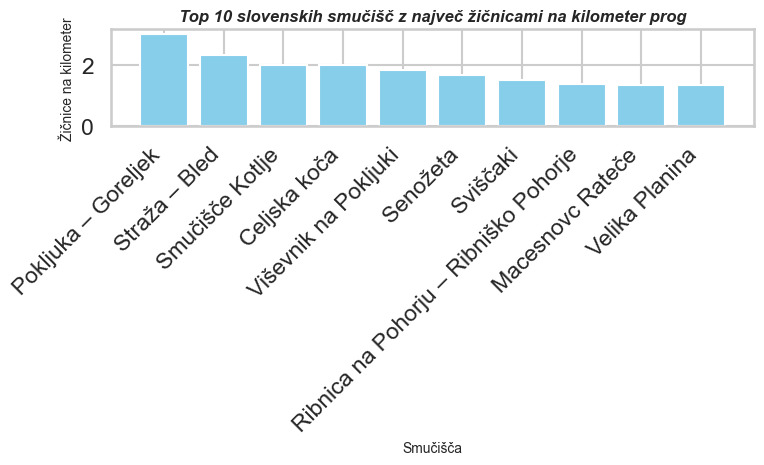

In [1208]:
# graf
plt.figure(figsize=(8, 5))
plt.bar(top_10_smucisca['ime'], top_10_smucisca['razmerje_zicnic_proge'], color='skyblue')
plt.title('Top 10 slovenskih smučišč z največ žičnicami na kilometer prog', fontsize=12, fontweight='bold', style='italic')
plt.xlabel('Smučišča', fontsize=10)
plt.ylabel('Žičnice na kilometer', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>4.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Slovenska smučišča so slabše ocenjena od smučišč sosednje Avstrije in Italije. Imajo tudi krajše proge.</h4>

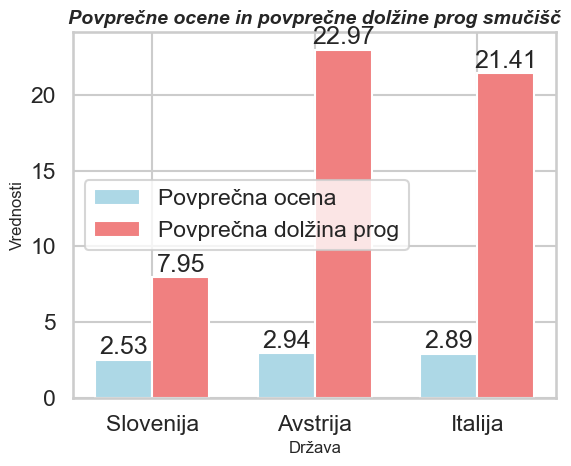

In [1209]:
italijanska_smucisca = smucisca[smucisca['država']== 'Italy']
avstrijska_smucisca = smucisca[smucisca['država']== 'Austria']

povprecna_ocena_slovenija = slovenska_smucisca['ocena'].mean()
povprecna_ocena_avstrija = avstrijska_smucisca['ocena'].mean()
povprecna_ocena_italija = italijanska_smucisca['ocena'].mean()

povprecno_proge_slovenija = slovenska_smucisca['proge'].mean()
povprecno_proge_avstrija = avstrijska_smucisca['proge'].mean()
povprecno_proge_italija = italijanska_smucisca['proge'].mean()

povprecne_ocene = [povprecna_ocena_slovenija, povprecna_ocena_avstrija, povprecna_ocena_italija]
povprecno_proge = [povprecno_proge_slovenija, povprecno_proge_avstrija, povprecno_proge_italija]

drzave = ['Slovenija', 'Avstrija', 'Italija']
povprecne_ocene = [povprecna_ocena_slovenija, povprecna_ocena_avstrija, povprecna_ocena_italija]  # vaše vrednosti
povprecno_proge = [povprecno_proge_slovenija, povprecno_proge_avstrija, povprecno_proge_italija]  # vaše vrednosti

# Ustvarimo graf
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
index = np.arange(len(drzave))

# Narišemo stolpce
ax.bar(index, povprecne_ocene, bar_width, label='Povprečna ocena', color='lightblue')
ax.bar(index + bar_width, povprecno_proge, bar_width, label='Povprečna dolžina prog', color='lightcoral')

# Nastavimo oznake in legendo
ax.set_xlabel('Država', fontsize=12)
ax.set_ylabel('Vrednosti', fontsize=12)
ax.set_title('Povprečne ocene in povprečne dolžine prog smučišč', fontsize=14, fontweight='bold', style='italic')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(drzave)
ax.legend()

# Dodamo vrednosti nad stolpci
for i in range(len(drzave)):
    ax.text(i, povprecne_ocene[i] + 0.05, round(povprecne_ocene[i], 2), ha='center', va='bottom')
    ax.text(i + bar_width, povprecno_proge[i] + 0.05, round(povprecno_proge[i], 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Kot je enostavno razvidno iz grafa, je hipoteza _POTRJENA_.